### Classification (Part 2) and Model Selection

In [4]:
%pylab inline
import numpy as np
from sklearn import neighbors
from sklearn import svm
from sklearn import model_selection
from numpy import genfromtxt
from sklearn.preprocessing import MinMaxScaler
import glob

Populating the interactive namespace from numpy and matplotlib


### Spam Detection 

In this problem, I constructed a crude spam detector. As you all know, when you receive an e-mail, it can be divided into one of two types: ham (useful mail, label $-1$) and spam (junk mail, label $+1$). In the [olden days](http://www.paulgraham.com/spam.html), people tried writing a bunch of rules to detect spam. However, it was quickly seen that machine learning approaches work fairly well for a little bit of work. 

I designed a spam detector by applying some of the classification techniques you learned in class to a batch of emails used to train and test [SpamAssassin](http://spamassassin.apache.org/), a leading anti-spam software package. 

Let the *vocabulary* of a dataset be a list of all terms occuring in a data set. So, for example, a vocabulary could be ["cat","dog","chupacabra", "aerospace", ...]. 

Our features will be based only the frequencies of terms in our vocabulary occuring in the e-mails (such an approach is called a *bag of words* approach, since we ignore the positions of the terms in the emails). The $j$-th feature is the number of times term $j$ in the vocabulary occurs in the email. If you are interested in further details on this model, you can see Chapters 6 and 13 in [Manning's Book](http://nlp.stanford.edu/IR-book/).

I used the following classifiers in this problem:
- sklearn.naive_bayes.BernoulliNB (Naive Bayes Classifier with Bernoulli Model)
- sklearn.naive_bayes.MultinomialNB (Naive Bayes Classifier with Multinomial Model)
- sklearn.svm.LinearSVC (Linear Support Vector Machine)
- sklearn.linear_model.LogisticRegression (Logistic Regression)
- sklearn.neighbors.KNeighborsClassifier (1-Nearest Neighbor Classifier)

In the context of the Bernoulli Model for Naive Bayes, scikit-learn will binarize the features by interpretting the $j$-th feature to be $1$ if the $j$-th term in the vocabulary occurs in the email and $0$ otherwise. This is a categorical Naive Bayes model, with binary features. 

A sample Ham email is:

    From nic@starflung.com  Mon Jun 24 17:06:54 2002
    Return-Path: 7910726.0.27May2002215326@mp.opensrs.net
    Delivery-Date: Tue May 28 02:53:28 2002
    Received: from mp.opensrs.net (mp.opensrs.net [216.40.33.45]) by
        dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g4S1rSe14718 for
        <zzz@spamassassin.taint.org>; Tue, 28 May 2002 02:53:28 +0100
    Received: (from popensrs@localhost) by mp.opensrs.net (8.9.3/8.9.3) id
        VAA04361; Mon, 27 May 2002 21:53:26 -0400
    Message-Id: <7910726.0.27May2002215326@mp.opensrs.net>
    Date: Mon, 27 May 2002 21:53:26 -0500 (EST)
    From: "Starflung NIC" <nic@starflung.com>
    To: <zzz@spamassassin.taint.org>
    Subject: Automated 30 day renewal reminder 2002-05-27
    X-Keywords: 

    The following domains that are registered as belonging
    to you are due to expire within the next 60 days. If
    you would like to renew them, please contact
    nic@starflung.com; otherwise they will be deactivated
    and may be registered by another.


    Domain Name, Expiry Date
    nutmegclothing.com, 2002-06-26
    
    
A sample Spam email is: 

    From jjj@mymail.dk  Fri Aug 23 11:03:31 2002
    Return-Path: <jjj@mymail.dk>
    Delivered-To: zzzz@localhost.example.com
    Received: from localhost (localhost [127.0.0.1])
        by phobos.labs.example.com (Postfix) with ESMTP id 478B54415C
        for <zzzz@localhost>; Fri, 23 Aug 2002 06:02:57 -0400 (EDT)
    Received: from mail.webnote.net [193.120.211.219]
        by localhost with POP3 (fetchmail-5.9.0)
        for zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:02:57 +0100 (IST)
    Received: from smtp.easydns.com (smtp.easydns.com [205.210.42.30])
        by webnote.net (8.9.3/8.9.3) with ESMTP id IAA08912;
        Fri, 23 Aug 2002 08:13:36 +0100
    From: jjj@mymail.dk
    Received: from mymail.dk (unknown [61.97.34.233])
        by smtp.easydns.com (Postfix) with SMTP
        id 7484A2F85C; Fri, 23 Aug 2002 03:13:31 -0400 (EDT)
    Reply-To: <jjj@mymail.dk>
    Message-ID: <008c61d64eed$6184e5d5$4bc22de3@udnugg>
    To: bbr_hooten@yahoo.com
    Subject: HELP WANTED.  WORK FROM HOME REPS.
    MiME-Version: 1.0
    Content-Type: text/plain;
        charset="iso-8859-1"
    X-Priority: 3 (Normal)
    X-MSMail-Priority: Normal
    X-Mailer: Microsoft Outlook, Build 10.0.2616
    Importance: Normal
    Date: Fri, 23 Aug 2002 03:13:31 -0400 (EDT)
    Content-Transfer-Encoding: 8bit

    Help wanted.  We are a 14 year old fortune 500 company, that is
    growing at a tremendous rate.  We are looking for individuals who
    want to work from home.

    This is an opportunity to make an excellent income.  No experience
    is required.  We will train you.

    So if you are looking to be employed from home with a career that has
    vast opportunities, then go:

    http://www.basetel.com/wealthnow

    We are looking for energetic and self motivated people.  If that is you
    than click on the link and fill out the form, and one of our
    employement specialist will contact you.

    To be removed from our link simple go to:

    http://www.basetel.com/remove.html


    1349lmrd5-948HyhJ3622xXiM0-290VZdq6044fFvN0-799hUsU07l50



First, we will load the data. Our dataset has a bit over 9000 emails, with about 25% of them being spam. We will use 50% of them as a training set, 25% of them as a validation set and 25% of them as a test set. 

In [5]:
# Get list of emails
spamfiles=glob.glob('./Data/Spam/*')
hamfiles=glob.glob('./Data/Ham/*')

In [6]:
# First, we will split the files into the training, validation and test sets.

np.random.seed(seed=222017) # seed the RNG for repeatability

fnames=np.asarray(spamfiles+hamfiles)
nfiles=fnames.size
labels=np.ones(nfiles)
labels[len(spamfiles):]=-1

# Randomly permute the files we have
idx=np.random.permutation(nfiles)
fnames=fnames[idx]
labels=labels[idx]

#Split the file names into which set they belong to
tname=fnames[:int(nfiles/2)]
trainlabels=labels[:int(nfiles/2)]
vname=fnames[int(nfiles/2):int(nfiles*3/4)]
vallabels=labels[int(nfiles/2):int(nfiles*3/4)]
tename=fnames[int(3/4*nfiles):]
testlabels=labels[int(3/4*nfiles):]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Get our Bag of Words Features from the data
bow = CountVectorizer(input='filename',encoding='iso-8859-1',binary=False)
traindata=bow.fit_transform(tname)
valdata=bow.transform(vname)
testdata=bow.transform(tename)

The $100$ most and least common terms in the vocabulary are:

In [8]:
counts=np.reshape(np.asarray(np.argsort(traindata.sum(axis=0))),-1)
vocab=np.reshape(np.asarray(bow.get_feature_names()),-1)
print ("100 most common terms: " , ','.join(str(s) for s in vocab[counts[-100:]]), "\n")
print ("100 least common terms: " , ','.join(str(s) for s in vocab[counts[:100]]))

100 most common terms:  slashnull,dogma,click,not,request,ist,exmh,as,thu,wed,jmason,have,cnet,lists,or,are,mon,html,freshrpms,date,mailman,align,message,00,12,users,postfix,text,arial,type,bgcolor,rpm,ie,22,linux,version,be,taint,your,mailto,20,admin,table,sourceforge,content,color,jm,face,on,border,example,127,aug,gif,this,href,10,img,subject,src,09,nbsp,sep,it,that,0100,height,spamassassin,esmtp,is,size,xent,you,fork,tr,in,list,11,www,br,width,received,localhost,id,of,and,org,by,with,for,net,td,font,2002,from,3d,http,to,the,com 

100 least common terms:  ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó,snd_index,crittenden,vghhbmsgww91iezvcibzb3vyifrpbwusiefu,snd_major,criuqccibiqnijvkpqkraocgwoeadz9qikwzkkxzo94ow8jaq7kza2xlzdpk9fw07swhmk6zfx4k,crjowqpf7aywdqg8cke9fwakiatnugirizcja5ougeakmggdbyyditzrgcracagvtgzb05k6j8,vgh9,crlsbd,crlsca,vgggkvaadjknu,vgfliejvpgjypldvcmtvdxqgncbqywnrpc9ipjxicj4gidxm,cro19c3zkymlwxiwrclxwvnkbo,vgfby5giuasgpjnj9rtm42jaariaaabm77x,croatian,croatians,sndqbqy,c

We will have our training data in `traindata` (with labels in `trainlabels`), validation data in `valdata` (with labels in `vallabels`) and test data in `testdata` (with labels in `testlabels`). The data is stored as a sparse scipy matrix (scipy.sparse.csr.csr_matrix), since we have a decent number of features (~100k), most of which are zero (~0.2% are non-zero), this allows storing the data in a few megabytes. Directly storing it as a numpy array would take around 8 gigabytes. Working with sparse data can make many algorithms run faster and use less storage. 

I trained each of the following classifiers:
- sklearn.naive_bayes.BernoulliNB (Naive Bayes Classifier with Bernoulli Model)
- sklearn.naive_bayes.MultinomialNB (Naive Bayes Classifier with Multinomial Model)
- sklearn.svm.LinearSVC (Linear Support Vector Machine)
- sklearn.linear_model.LogisticRegression (Logistic Regression)
- sklearn.neighbors.KNeighborsClassifier (as a 1-Nearest Neighbor Classifier)
on the training data in `traindata` with corresponding labels `trainlabels`. Use the default parameters, unless otherwise noted.

For each classifier:
- Time it took to fit the classifier (i.e. call the .fit method) 
- Training Error 



In [1]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

In [10]:

def classifierError(truelabels,estimatedlabels):
    
    error_counter = 0
    
    for i in range(0, truelabels.shape[0]):
        
        if(truelabels[i] != (estimatedlabels[i])):
            error_counter += 1
            
    return (error_counter/truelabels.shape[0])

clf_bernoulli = BernoulliNB()
print("Bernoulli NB")
%timeit clf_bernoulli.fit(traindata, trainlabels)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
estimated_trainlabels = clf_bernoulli.predict(traindata)
error = classifierError(trainlabels, estimated_trainlabels)
print("Training Error:", error,"\n")

clf_multinomial = MultinomialNB()
print("Multinomial NB")
%timeit clf_multinomial.fit(traindata, trainlabels)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
estimated_trainlabels = clf_multinomial.predict(traindata)
error = classifierError(trainlabels, estimated_trainlabels)
print("Training Error:", error,"\n")

clf_linearsvc = LinearSVC(random_state=0)
print("Linear SVC")
%timeit clf_linearsvc.fit(traindata, trainlabels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
estimated_trainlabels = clf_linearsvc.predict(traindata)
error = classifierError(trainlabels, estimated_trainlabels)
print("Training Error:", error,"\n")

clf_logisticregression = LogisticRegression()
print("Logistic Regression")
%timeit clf_logisticregression.fit(traindata, trainlabels)
estimated_trainlabels = clf_logisticregression.predict(traindata)
error = classifierError(trainlabels, estimated_trainlabels)
print("Training Error:", error,"\n")

clf_kneighbors = KNeighborsClassifier()
print("KNeighbors Classifier")
%timeit clf_kneighbors.fit(traindata, trainlabels)
estimated_trainlabels = clf_kneighbors.predict(valdata)
error = classifierError(vallabels,estimated_trainlabels) 
print("Training error:", error, "\n")

# clf_svc = SVC()
# print ("SVC")
# %timeit clf_svc.fit(traindata, trainlabels) 
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)
# estimated_trainlabels = clf_svc.predict(traindata)
# error = classifierError(trainlabels, estimated_trainlabels)
# print("Training Error:", error,"\n")

Bernoulli NB
29.5 ms ± 4.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Training Error: 0.05541292255027813 

Multinomial NB
17.7 ms ± 476 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Training Error: 0.01647411210954215 

Linear SVC
545 ms ± 6.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Training Error: 0.0 

Logistic Regression
1.76 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Training Error: 0.0 

KNeighbors Classifier
5.06 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Training error: 0.03465982028241335 



I ran each of the classifiers on the validation data:
- sklearn.naive_bayes.BernoulliNB (Naive Bayes Classifier with Bernoulli Model)
- sklearn.naive_bayes.BernoulliNB (Naive Bayes Classifier with Multiomial Model)
- sklearn.svm.LinearSVC (Linear Support Vector Machine)
- sklearn.linear_model.LogisticRegression (Logistic Regression)
- sklearn.neighbors.KNeighborsClassifier (as a 1-Nearest Neighbor Classifier)
on the training data in `traindata` with corresponding labels `trainlabels`. Use the default parameters, unless otherwise noted.

For each classifier:
- Store the labels it predicted as \_\_vallabels, where \_\_ is NB,MB,SVM,LR,NN respectively. 
- Time it took to run the classifier on the data 
- Validation Error 


In [11]:

print("Naive Bayes Classifier with Bernoulli Model")
%timeit clf_bernoulli.predict(valdata)
NB_vallabels = clf_bernoulli.predict(valdata)
error = classifierError(vallabels, NB_vallabels)
print("Validation Error:", error,"\n")

print("Naive Bayes Classifier with Multinomial Model")
%timeit clf_multinomial.predict(valdata)
MB_vallabels = clf_multinomial.predict(valdata)
error = classifierError(vallabels, MB_vallabels)
print("Validation Error:", error,"\n")

print("Linear Suppport Vector Machine")
%timeit clf_linearsvc.predict(valdata)
SVM_vallabels = clf_linearsvc.predict(valdata)
error = classifierError(vallabels, SVM_vallabels)
print("Validation Error:", error,"\n")

print("Logistic Regression")
%timeit clf_logisticregression.predict(valdata)
LR_vallabels = clf_logisticregression.predict(valdata)
error = classifierError(vallabels, LR_vallabels)
print("Validation Error:", error,"\n")

print("1-Nearest Neighbor Classifier")
clf_kneighbors = neighbors.KNeighborsClassifier(n_neighbors=1)
clf_kneighbors.fit(traindata, trainlabels)
%timeit clf_kneighbors.predict(valdata)
NN_vallabels = clf_kneighbors.predict(valdata)
error = classifierError(vallabels,NN_vallabels) 
print("Validation error:\n", error, "\n")


Naive Bayes Classifier with Bernoulli Model
15.3 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Validation Error: 0.09584937954642704 

Naive Bayes Classifier with Multinomial Model
6.1 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Validation Error: 0.03123662815575524 

Linear Suppport Vector Machine
2.63 ms ± 42.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Validation Error: 0.008130081300813009 

Logistic Regression
2.78 ms ± 305 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Validation Error: 0.008130081300813009 

1-Nearest Neighbor Classifier
2.19 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Validation error:
 0.017115960633290545 



Let us take a more nuanced look at the type of errors made on a data set. The following function calculates a confusion matrix and some statistics.

In [12]:
def ConfMatr(truelabels,estimatedlabels,classifiername):
    # classifiername is a string, such as 'Naive Bayes (Bernoulli)'
    cm=np.zeros((2,2))
    cm[0,0]=np.sum(np.logical_and(truelabels==1,estimatedlabels==1)) # True Positives
    cm[0,1]=np.sum(np.logical_and(truelabels==-1,estimatedlabels==1)) # False Positive
    cm[1,0]=np.sum(np.logical_and(truelabels==1,estimatedlabels==-1)) # False Negative
    cm[1,1]=np.sum(np.logical_and(truelabels==-1,estimatedlabels==-1)) # True Negatives
    print ("Classifier Name: %s"% classifiername )
    print ("True Positives:", cm[0,0], "False Positive:", cm[0,1])
    print ("False Negative:", cm[1,0], "True Negatives:", cm[1,1])
    print ("True Positive Rate : ", cm[0,0]/np.sum(truelabels==1))
    print ("False Positive Rate: ", cm[0,1]/np.sum(truelabels==-1))
    print ("---")

Run ConfMatr using the validation labels and their estimates for all the classifiers we've used in this problem. **(5 points)**

In [13]:
# Put your code here
ConfMatr(vallabels, NB_vallabels,"Naive Bayes Classifier with Bernoulli Model")
ConfMatr(vallabels, MB_vallabels,"Naive Bayes Classifier with Multinomial Model")
ConfMatr(vallabels, SVM_vallabels,"Linear Suppport Vector Machine")
ConfMatr(vallabels, LR_vallabels,"Logistic Regression")
ConfMatr(vallabels, NN_vallabels,"1-Nearest Neighbor Classifier")

Classifier Name: Naive Bayes Classifier with Bernoulli Model
True Positives: 389.0 False Positive: 11.0
False Negative: 213.0 True Negatives: 1724.0
True Positive Rate :  0.646179401993
False Positive Rate:  0.00634005763689
---
Classifier Name: Naive Bayes Classifier with Multinomial Model
True Positives: 538.0 False Positive: 9.0
False Negative: 64.0 True Negatives: 1726.0
True Positive Rate :  0.893687707641
False Positive Rate:  0.00518731988473
---
Classifier Name: Linear Suppport Vector Machine
True Positives: 593.0 False Positive: 10.0
False Negative: 9.0 True Negatives: 1725.0
True Positive Rate :  0.985049833887
False Positive Rate:  0.00576368876081
---
Classifier Name: Logistic Regression
True Positives: 593.0 False Positive: 10.0
False Negative: 9.0 True Negatives: 1725.0
True Positive Rate :  0.985049833887
False Positive Rate:  0.00576368876081
---
Classifier Name: 1-Nearest Neighbor Classifier
True Positives: 576.0 False Positive: 14.0
False Negative: 26.0 True Negatives

[True positive rate is how many how many spam emails actually get classified as spam email.
The higher the true positive rate, the more spam gets filtered out. Therefore, we would want a true positive rate.
False positive rate is how many ham emails get classified as spam email.
We want the false positive rate to be extremely low, because we don't want to miss any ham email which may be of importance. ]

[The classifier I would choose for this problem is a linear SVM. The linear SVM has the highest true positive rate and one of the least false positive rates. For detecting spam in the UofI email system, I would firstly have a large bunch of keywords to check for in emails, just like the problem we just solved above. I would also have a report spam button in user's mailboxes to identify new spam threats and add keywords from the new spam threats to my existing keywords set. The report spam button is one of the biggest factors why Gmail is so successful in preventing spam. ]

In [14]:

estimated_testlabels = clf_linearsvc.predict(testdata)
error = classifierError(testlabels, estimated_testlabels)
print("Test Error:", error,"\n")

ConfMatr(testlabels, estimated_testlabels,"Linear Suppport Vector Machine")

# clf_linearsvc.predict(valdata)
# SVM_vallabels = clf_linearsvc.predict(valdata)
# error = classifierError(vallabels, SVM_vallabels)
# print("Validation Error:", error,"\n")

Test Error: 0.00641573994867408 

Classifier Name: Linear Suppport Vector Machine
True Positives: 613.0 False Positive: 8.0
False Negative: 7.0 True Negatives: 1710.0
True Positive Rate :  0.988709677419
False Positive Rate:  0.0046565774156
---


[Test Error: 0.00641573994867408 

Classifier Name: Linear Suppport Vector Machine
True Positives: 613.0 False Positive: 8.0
False Negative: 7.0 True Negatives: 1710.0
True Positive Rate :  0.988709677419
False Positive Rate:  0.0046565774156

The false positive rate for the test data is actually lower than the false positive rate for the validation data. This is a good thing because this means that lesser ham emails are classified as spam emails.]

### Cross-Validation 

This is a function which implements $5$-fold cross-validation to estimate the error of a classifier with cross-validation with the 0,1-loss for k-Nearest Neighbors (kNN). 

Input:
* A (N,d) numpy.ndarray of training data, trainData (with N divisible by 5)
* A length $N$ numpy.ndarray of training labels, trainLabels
* A number $k$, for which cross-validated error estimates will be outputted for $1,\ldots,k$

The output will be a vector (represented as a numpy.ndarray) err, such that err[i] is the cross-validated estimate of using i neighbors (err will be of length $k+1$; the zero-th component of the vector will be meaningless). 


In [25]:
def crossValidationkNN(trainData,trainLabels,k):

    # Error vector
    err = np.zeros(k + 1)

    # Number of data points
    n = trainData.shape[0]
    n /= 5
    
    copy_trainData = trainData
    copy_trainLabels = trainLabels
    
    for i in range(1, k + 1):
        
        err_holder = 0
        for j in range(1, (5 + 1)):
            
            # Extract the validation set
            validation_set_data = trainData[int(((j - 1) * n)):int((j * n))]
            #print(validation_set_data.shape[0])
            validation_set_labels = trainLabels[int(((j - 1) * n)):int((j * n))]
            #print(validation_set_labels.shape[0])

            #arr = np.delete(arr, np.s_[0:2], 0)
            training_set_data = np.delete(copy_trainData, np.s_[int(((j - 1) * n)):int((j * n))], 0)
            #print(training_set_data.shape[0])
            training_set_labels = np.delete(copy_trainLabels, np.s_[int(((j - 1) * n)):int((j * n))], 0)
            #print(training_set_labels.shape[0])
            #print(i)
            # Reset training set holders
            copy_trainData = trainData
            copy_trainLabels = trainLabels

            # Perform training
            neigh = neighbors.KNeighborsClassifier(n_neighbors=i, algorithm='brute')
            neigh.fit(training_set_data, training_set_labels)
            estimatedvallabels = neigh.predict(validation_set_data)
            #vallabels_cross_validation = vallabels[int(((j - 1) * n)):int((j * n))]
            err_holder += classifierError(validation_set_labels,estimatedvallabels)
        err[i] = err_holder/5
        #err[i] = neigh.score()
    return err


Now, we will load some data (acquired from <a href="http://www.cs.ubc.ca/~murphyk/">K.P. Murphy</a>'s <a href="https://github.com/probml/pmtk3"> PMTK tookit</a>).

In [26]:
problem2_tmp= genfromtxt('Data/p2.csv', delimiter=',')

# Randomly reorder the data
np.random.seed(seed=2217) # seed the RNG for repeatability
idx=np.random.permutation(problem2_tmp.shape[0])
problem2_tmp=problem2_tmp[idx]

#The training data which you will use is called "traindata"
traindata=problem2_tmp[:200,:2]
#The training labels are in "labels"
trainlabels=problem2_tmp[:200,2]

#The test data which you will use is called "testdata" with labels "testlabels"
testdata=problem2_tmp[200:,:2]
testlabels=problem2_tmp[200:,2]

Plot the cross-validation error versus number of neighbors for $1,\ldots,30$ neighbors.

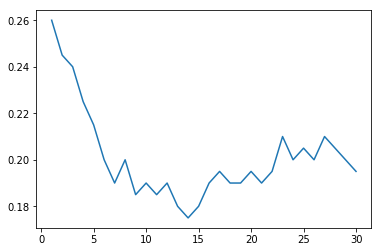

In [27]:


import matplotlib.pyplot as plt
index = np.arange(0,31)
# 5-fold Cross validation
err = crossValidationkNN(traindata,trainlabels,30)
plt.plot(index[1:], err[1:])

Number of neighbors which minimizes the cross-validation error:

In [28]:

min_error = np.amin(err[1:])
min_neighbors = np.argmin(err[1:])
print("Minimum Cross Validation Error: ", min_error, "\n")
print("Number of neighbors: ", min_neighbors + 1, "\n")

Minimum Cross Validation Error:  0.175 

Number of neighbors:  14 



[Minimum Cross Validation Error:  0.175

Number of neighbors:  14]

Trained a kNN model on the whole training data using the minimum number of neighbors found:

In [29]:

neigh_train = neighbors.KNeighborsClassifier(n_neighbors=14, algorithm='brute')
neigh_train.fit(traindata, trainlabels)
estimatedtestlabels_knn = neigh_train.predict(testdata)
err_knn = classifierError(testlabels,estimatedtestlabels_knn)
print("Test Error: ", err_knn, "\n")

Test Error:  0.214 



[Test Error:  0.214
This test error is much higher than the previous higher cross validation error.]


### Detecting Cancer with SVMs and Logistic Regression 

We consider the [Breast Cancer Wisconsin Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) from 
W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993. 

The authors diagnosed people by characterizing 3 cell nuclei per person extracted from the breast (pictures [here](http://web.archive.org/web/19970225174429/http://www.cs.wisc.edu/~street/images/)), each with 10 features (for a 30-dimensional feature space):

1. radius (mean of distances from center to points on the perimeter) 

2. texture (standard deviation of gray-scale values) 

3. perimeter 

4. area 

5. smoothness (local variation in radius lengths) 

6. compactness (perimeter^2 / area - 1.0) 

7. concavity (severity of concave portions of the contour) 

8. concave points (number of concave portions of the contour) 

9. symmetry 

10. fractal dimension ("coastline approximation" - 1)

and classified the sample into one of two classes: Malignant ($+1$) or Benign ($-1$). You can read the original paper for more on what these features mean.

I attempted to classify if a sample is Malignant or Benign using Support Vector Machines, as well as Logistic Regression. Since we don't have all that much data, I used 10-fold cross-validation to tune our parameters for our SVMs and Logistic Regression. We use 90% of the data for training, and 10% for testing.


First, we load the data. We will use scikit-learn's train test split function to split the data. The data is scaled for reasons outlined <a href="http://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf">here</a>. In short, it helps avoid some numerical issues and avoids some problems with certain features which are typically large affecting the SVM optimization problem unfairly compared to features which are typically small. 

In [30]:
from sklearn.model_selection import train_test_split

cancer = genfromtxt('Data/wdbc.csv', delimiter=',')

np.random.seed(seed=282017) # seed the RNG for repeatability
idx=np.random.permutation(cancer.shape[0])
cancer=cancer[idx]

cancer_features=cancer[:,1:]
cancer_labels=cancer[:,0]

#The training data is in data_train with labels label_train. 
# The test data is in data_test with labels label_test.
data_train, data_test, label_train, label_test = train_test_split(cancer_features,cancer_labels,test_size=0.1,random_state=292017)

# Rescale the training data and scale the test data correspondingly
scaler=MinMaxScaler(feature_range=(-1,1))
data_train=scaler.fit_transform(data_train) #Note that the scaling is determined solely via the training data!
data_test=scaler.transform(data_test)

Use cross-validation to select a value of $C$ for a linear SVM (sklearn.svm.LinearSVC) by varying $C$ from $2^{-5},2^{-4},\ldots,2^{15}$. 


In [31]:

from sklearn import svm
from sklearn.model_selection import cross_val_score
X = data_train
y = label_train
for i in range(-5, 16):
    val = 2**(i)
    print("C:", val)
    svc = svm.LinearSVC(C=val)
#lasso = linear_model.Lasso()
    cross_validation_error = 1 - mean(cross_val_score(svc, X, y, cv=10))  
    print("Cross Validation Error:",cross_validation_error, "\n")
#print(cross_val_score(svc, X, y, cv=10))
#cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=10, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)

C: 0.03125
Cross Validation Error: 0.0349924585219 

C: 0.0625
Cross Validation Error: 0.0329939668175 

C: 0.125
Cross Validation Error: 0.027149321267 

C: 0.25
Cross Validation Error: 0.0291478129713 

C: 0.5
Cross Validation Error: 0.0330693815988 

C: 1
Cross Validation Error: 0.0311463046757 

C: 2
Cross Validation Error: 0.0311840120664 

C: 4
Cross Validation Error: 0.0292609351433 

C: 8
Cross Validation Error: 0.0292609351433 

C: 16
Cross Validation Error: 0.0311463046757 

C: 32
Cross Validation Error: 0.0368778280543 

C: 64
Cross Validation Error: 0.0351055806938 

C: 128
Cross Validation Error: 0.0351825037707 

C: 256
Cross Validation Error: 0.0429487179487 

C: 512
Cross Validation Error: 0.0467963800905 

C: 1024
Cross Validation Error: 0.0466440422323 

C: 2048
Cross Validation Error: 0.052641025641 

C: 4096
Cross Validation Error: 0.0371432880845 

C: 8192
Cross Validation Error: 0.0428355957768 

C: 16384
Cross Validation Error: 0.0469095022624 

C: 32768
Cross Va

[C: 0.125
Cross Validation Error: 0.027149321267]

I experimented with using kernels in an SVM, particularly the Gaussian RBF kernel (in sklearn.svm.SVC). The SVM has two parameters to tune in this case: $C$ (as before), and $\gamma$, which is a parameter in the RBF. 

Use cross-validation to select parameters $(C,\gamma)$ by searching varying $(C,\gamma)$ over $C=2^{-5},2^{-4},\ldots,2^{15}$ and $\gamma=2^{-15},\ldots,2^{3}$ 

This procedure is known as a *grid search*.We are using a fairly coarse grid for this problem, but one could use a finer grid once the rough range of good parameters is known (rather than starting with a fine grid, which would waste a lot of time). 

In [32]:

mini = 1
# Loop for C
for i in range(-5, 16):
    
    # Loop for Gamma
    for j in range(-15, 4):
        
        val = 2**(i)
        #print("C:", val)
        gam = 2**(j)
        #print("Gamma:", gam)
        svc = svm.SVC(C=val, gamma=gam, kernel='rbf')
        #lasso = linear_model.Lasso()
        
        cross_validation_error = 1 - mean(cross_val_score(svc, X, y, cv=10))
        
        if (cross_validation_error < mini):
            
            # Store C, gamma indices
            i_val = i
            j_gam = j
            mini = cross_validation_error
            
print("Cross Validation Error:",mini, "\n")
print("C:", 2**(i_val), "\n")
print("Gamma:", 2**(j_gam), "\n")
        

Cross Validation Error: 0.0194570135747 

C: 8 

Gamma: 0.125 



[Cross Validation Error: 0.0194570135747 

C: 8 

Gamma: 0.125

These values of C, Gamma minimise the validation error]

ogistic Regression normally has a regularizer parameter to promote stability. Scikit-learn calls this parameter $C$ (which is like $\lambda^{-1}$ in the notes); see the [LibLinear](http://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf) documentation for the exact meaning of $C$. 

Use cross-validation to select a value of $C$ for logistic regression (sklearn.linear_model.LogisticRegression) by varying $C$ from $2^{-14},2^{-4},\ldots,2^{14}$. 

In [33]:

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
X = data_train
y = label_train
min = 1

for i in range(-14, 15):
    val = 2**(i)
    #print("C:", val)
    lr = linear_model.LogisticRegression(C=val)
#lasso = linear_model.Lasso()
    cross_validation_error = 1 - mean(cross_val_score(lr, X, y, cv=10))  
    #print("Cross Validation Error:",cross_validation_error, "\n")
    if (cross_validation_error < min):
        min = cross_validation_error
        i_val = i
        
print("Cross Validation Error:", min, "\n")
print("C:", 2**(i_val))

Cross Validation Error: 0.027149321267 

C: 2


[Cross Validation Error: 0.027149321267 

C: 2]

[Out of all the classifiers tested, I would pick Linear SVM. It has the least cross-validation error. Linear SVM is also easier to train. Gaussian RBF takes a long time to compute.]

Finally, I trained the classifier selected above on the whole training set and estimated the prediction error using the test set. 

In [34]:

clf_linearsvc = LinearSVC(random_state=0)

clf_linearsvc.fit(data_train, label_train)
LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)
estimated_test_labels = clf_linearsvc.predict(data_test)
error = classifierError(label_test, estimated_test_labels)
print("Prediction Error:", error,"\n")

Prediction Error: 0.017543859649122806 



[Prediction Error: 0.017543859649122806
The prediction error is smaller than the cross-validation error]

[0-1 loss might not be the most appropriate performance measure. If you are suffering from a disease and it does not get caught it can be a huge problem. If you are not suffering from a disease and it gets reported its not a big deal. Therefore, we need some quantification for a a false positive and a false negative.]